In [1]:
# Import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load in data
df = pd.read_csv('../data/cleaned_data/master.csv')
df.head(50)

,date,nonglu_price,hommali_price,agri_prod_index,crops_prod_index,paddy_prod_index,nonglu_prod_index,hommali_prod_index,agri_price_index,crops_price_index,...,water_station_M7,water_station_N1,water_station_N67,water_station_Ny1B,water_station_P1,water_station_P17,water_station_S4B,water_station_Sw5A,water_station_Y17,water_station_Y1C
0,2006-01-01,6696.0,7628.0,109.703894,114.011647,43.580672,72.649707,8.077559,110.377654,113.821771,...,140.50,66.17,520.00,26.85,38.96,679.63,6.230000,97.92,1.24,20.25
1,2006-02-01,6633.0,7873.0,93.049409,91.755084,46.062229,85.832560,0.000000,111.337228,115.390439,...,87.75,39.02,501.32,26.22,64.11,573.91,4.690000,69.55,0.00,13.07
2,2006-03-01,6649.0,7960.0,92.803780,87.828340,74.516499,138.854375,0.000000,112.498075,117.876876,...,108.95,20.94,558.72,42.23,68.26,523.38,2.230000,60.02,2.32,35.51
3,2006-04-01,6880.0,8028.0,75.452369,67.662286,66.215260,123.385807,0.000000,115.595159,121.878356,...,188.40,45.73,692.79,61.08,84.68,508.65,0.060000,76.80,5.84,31.54
4,2006-05-01,6782.0,8069.0,77.366260,68.992476,35.785484,66.682829,0.000000,113.408937,119.725058,...,270.30,94.19,1027.25,44.98,146.19,1092.68,34.640000,88.76,168.17,268.37
5,2006-06-01,6621.0,8160.0,86.068584,76.384771,38.081443,70.961130,0.000000,115.684212,124.167243,...,303.51,88.76,1642.01,57.01,180.21,1118.74,17.380000,115.60,817.95,95.83
6,2006-07-01,6740.0,8353.0,85.249850,75.425317,35.308415,65.793856,0.000000,110.082402,117.363818,...,657.51,440.72,1810.37,172.32,187.32,741.09,77.500000,346.16,644.25,172.18
7,2006-08-01,6632.0,8612.0,97.305677,89.311110,40.943298,76.293923,0.000000,105.714531,111.622494,...,1975.82,1733.39,1690.04,121.20,422.63,775.58,134.370000,623.78,565.75,844.91
8,2006-09-01,6759.0,8642.0,94.291198,84.726398,46.554402,86.598400,0.000000,103.007651,108.116814,...,2979.56,808.39,3358.66,105.76,488.76,2484.62,290.740000,728.53,1986.00,1039.25
9,2006-10-01,6655.0,8685.0,97.657293,90.321810,84.946291,127.163424,27.826834,103.860914,109.965233,...,8063.34,442.98,3905.98,101.51,361.12,3461.10,190.460000,417.28,3578.82,403.51


In [3]:
# Convert 'date' column from string to datetime type
df['date'] = pd.to_datetime(df['date'])

# Set date column as the DataFrame index
df.set_index('date', inplace=True)

# Sort index according to the date
df.sort_index(inplace=True)

# Display first few rows to verify the reindexing
df.head()

,nonglu_price,hommali_price,agri_prod_index,crops_prod_index,paddy_prod_index,nonglu_prod_index,hommali_prod_index,agri_price_index,crops_price_index,paddy_price_index,...,water_station_M7,water_station_N1,water_station_N67,water_station_Ny1B,water_station_P1,water_station_P17,water_station_S4B,water_station_Sw5A,water_station_Y17,water_station_Y1C
date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,6696.0,7628.0,109.703894,114.011647,43.580672,72.649707,8.077559,110.377654,113.821771,100.581118,...,140.50,66.17,520.00,26.85,38.96,679.63,6.23,97.92,1.24,20.25
2006-02-01,6633.0,7873.0,93.049409,91.755084,46.062229,85.832560,0.000000,111.337228,115.390439,101.563145,...,87.75,39.02,501.32,26.22,64.11,573.91,4.69,69.55,0.00,13.07
2006-03-01,6649.0,7960.0,92.803780,87.828340,74.516499,138.854375,0.000000,112.498075,117.876876,103.063764,...,108.95,20.94,558.72,42.23,68.26,523.38,2.23,60.02,2.32,35.51
2006-04-01,6880.0,8028.0,75.452369,67.662286,66.215260,123.385807,0.000000,115.595159,121.878356,104.906097,...,188.40,45.73,692.79,61.08,84.68,508.65,0.06,76.80,5.84,31.54
2006-05-01,6782.0,8069.0,77.366260,68.992476,35.785484,66.682829,0.000000,113.408937,119.725058,104.687875,...,270.30,94.19,1027.25,44.98,146.19,1092.68,34.64,88.76,168.17,268.37


In [4]:
df.corr()

,nonglu_price,hommali_price,agri_prod_index,crops_prod_index,paddy_prod_index,nonglu_prod_index,hommali_prod_index,agri_price_index,crops_price_index,paddy_price_index,...,water_station_M7,water_station_N1,water_station_N67,water_station_Ny1B,water_station_P1,water_station_P17,water_station_S4B,water_station_Sw5A,water_station_Y17,water_station_Y1C
nonglu_price,1.000000,0.595778,-0.012385,-0.031919,-0.032443,0.044001,-0.050865,0.548312,0.565673,0.832905,...,0.059488,0.134281,-0.005598,0.082449,0.125377,0.101404,0.026918,0.138831,0.013399,0.091361
hommali_price,0.595778,1.000000,0.016882,-0.003276,-0.040722,0.094735,-0.076214,0.458660,0.420543,0.857329,...,0.003784,0.080017,-0.114813,0.024629,0.033773,-0.049698,-0.044635,0.052320,-0.087488,0.045089
agri_prod_index,-0.012385,0.016882,1.000000,0.995231,0.918436,0.587610,0.923464,-0.004433,-0.051338,-0.032083,...,0.258600,-0.140844,0.056790,-0.121851,-0.000749,-0.153200,-0.102467,-0.026100,0.043493,-0.098759
crops_prod_index,-0.031919,-0.003276,0.995231,1.000000,0.931188,0.605415,0.932305,-0.025300,-0.061625,-0.051660,...,0.249791,-0.153442,0.053788,-0.130220,-0.016017,-0.143422,-0.114540,-0.039232,0.041319,-0.112968
paddy_prod_index,-0.032443,-0.040722,0.918436,0.931188,1.000000,0.734864,0.975835,-0.053164,-0.052744,-0.056353,...,0.304711,-0.110030,0.133504,-0.122843,0.038463,-0.073581,-0.065258,-0.003261,0.116051,-0.073011
nonglu_prod_index,0.044001,0.094735,0.587610,0.605415,0.734864,1.000000,0.579181,0.071417,0.092848,0.066648,...,0.318090,-0.004638,0.195536,0.051999,0.164879,0.050556,0.088728,0.119946,0.177120,0.087908
hommali_prod_index,-0.050865,-0.076214,0.923464,0.932305,0.975835,0.579181,1.000000,-0.080416,-0.089122,-0.087883,...,0.263341,-0.125763,0.101092,-0.156481,0.001074,-0.106328,-0.100882,-0.037054,0.085193,-0.107370
agri_price_index,0.548312,0.458660,-0.004433,-0.025300,-0.053164,0.071417,-0.080416,1.000000,0.963500,0.644107,...,-0.006769,0.052667,-0.082557,0.050680,0.115409,-0.011290,-0.052320,0.040347,-0.021897,0.090031
crops_price_index,0.565673,0.420543,-0.051338,-0.061625,-0.052744,0.092848,-0.089122,0.963500,1.000000,0.655092,...,-0.020372,0.073364,-0.031673,0.051023,0.128518,0.076896,-0.043698,0.051483,0.015264,0.097547
paddy_price_index,0.832905,0.857329,-0.032083,-0.051660,-0.056353,0.066648,-0.087883,0.644107,0.655092,1.000000,...,0.021341,0.163366,-0.043626,0.081996,0.117553,0.051178,-0.006885,0.141699,0.003976,0.125459


## Observe Data

In [6]:
df.isnull().sum()

nonglu_price           0
hommali_price          0
agri_prod_index        0
crops_prod_index       0
paddy_prod_index       0
nonglu_prod_index      0
hommali_prod_index     0
agri_price_index       0
crops_price_index      0
paddy_price_index      0
nonglu_price_index     0
hommali_price_index    0
agri_export_value      0
rice_export_value      0
rice_export_amount     0
inflation              0
cpi_rice               0
pol_rate               0
neer                   0
reer                   0
sirikit_water          0
bhumibol_water         0
fertilizer_1           0
fertilizer_2           0
fertilizer_3           0
fertilizer_4           0
fertilizer_5           0
fertilizer_6           0
water_station_B10      0
water_station_C13      0
water_station_C2       0
water_station_G8       0
water_station_K10      0
water_station_K11A     0
water_station_Kgt3     0
water_station_Kh103    0
water_station_Kh58A    0
water_station_Kh72     0
water_station_M6A      0
water_station_M7       0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2006-01-01 to 2024-10-01
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nonglu_price         226 non-null    float64
 1   hommali_price        226 non-null    float64
 2   agri_prod_index      226 non-null    float64
 3   crops_prod_index     226 non-null    float64
 4   paddy_prod_index     226 non-null    float64
 5   nonglu_prod_index    226 non-null    float64
 6   hommali_prod_index   226 non-null    float64
 7   agri_price_index     226 non-null    float64
 8   crops_price_index    226 non-null    float64
 9   paddy_price_index    226 non-null    float64
 10  nonglu_price_index   226 non-null    float64
 11  hommali_price_index  226 non-null    float64
 12  agri_export_value    226 non-null    float64
 13  rice_export_value    226 non-null    float64
 14  rice_export_amount   226 non-null    float64
 15  inflation            

In [8]:
df.describe()

,nonglu_price,hommali_price,agri_prod_index,crops_prod_index,paddy_prod_index,nonglu_prod_index,hommali_prod_index,agri_price_index,crops_price_index,paddy_price_index,...,water_station_M7,water_station_N1,water_station_N67,water_station_Ny1B,water_station_P1,water_station_P17,water_station_S4B,water_station_Sw5A,water_station_Y17,water_station_Y1C
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,...,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,8641.705213,12872.294741,129.496450,128.632082,108.992843,113.084564,112.818970,139.894699,146.951286,148.056854,...,1611.045619,257.024071,993.810265,54.645177,107.221283,629.249248,47.698038,133.384690,285.491549,162.902389
std,1433.168741,2337.351495,50.026192,66.538067,161.045315,68.509969,330.493330,17.711874,21.097169,20.229461,...,2404.997052,358.117342,860.366151,43.292130,122.408600,567.556136,77.397892,152.841443,482.203203,258.506978
min,6339.000000,7628.000000,75.452369,55.093985,1.761403,3.282205,0.000000,99.909508,104.311728,100.581118,...,8.070000,5.790000,185.610000,4.600000,0.000000,31.510000,0.000000,13.700000,0.000000,0.340000
25%,7674.500000,11364.343605,99.919347,89.808658,36.330700,65.263411,0.000000,127.568267,130.856212,135.271067,...,111.262500,36.855000,366.297500,27.052500,28.392500,259.425000,0.575000,37.600000,0.000000,12.040000
50%,8221.517397,13369.500000,114.033901,107.697921,59.684924,101.441919,0.000000,140.131635,143.725195,147.631108,...,440.845000,89.385000,663.030000,40.745000,70.485000,512.675000,9.140000,73.445000,106.095000,37.860000
75%,9656.047319,14700.935063,136.466632,133.628701,92.951813,154.617698,8.040007,152.686578,161.436064,163.414437,...,2115.380000,367.492500,1287.527500,70.490000,133.405000,770.890000,59.140000,157.390000,455.325000,195.590000
max,13179.000000,17292.000000,329.360966,391.615710,746.069316,363.983809,1562.742921,194.036789,222.808044,196.191475,...,14551.690000,1798.710000,3912.810000,279.730000,749.020000,4330.960000,416.010000,879.400000,3578.820000,1791.250000


In [9]:
df.shape

(226, 49)

In [10]:
df.columns

Index(['nonglu_price', 'hommali_price', 'agri_prod_index', 'crops_prod_index',
       'paddy_prod_index', 'nonglu_prod_index', 'hommali_prod_index',
       'agri_price_index', 'crops_price_index', 'paddy_price_index',
       'nonglu_price_index', 'hommali_price_index', 'agri_export_value',
       'rice_export_value', 'rice_export_amount', 'inflation', 'cpi_rice',
       'pol_rate', 'neer', 'reer', 'sirikit_water', 'bhumibol_water',
       'fertilizer_1', 'fertilizer_2', 'fertilizer_3', 'fertilizer_4',
       'fertilizer_5', 'fertilizer_6', 'water_station_B10',
       'water_station_C13', 'water_station_C2', 'water_station_G8',
       'water_station_K10', 'water_station_K11A', 'water_station_Kgt3',
       'water_station_Kh103', 'water_station_Kh58A', 'water_station_Kh72',
       'water_station_M6A', 'water_station_M7', 'water_station_N1',
       'water_station_N67', 'water_station_Ny1B', 'water_station_P1',
       'water_station_P17', 'water_station_S4B', 'water_station_Sw5A',
       'w

# Explanatory Descriptive analysis

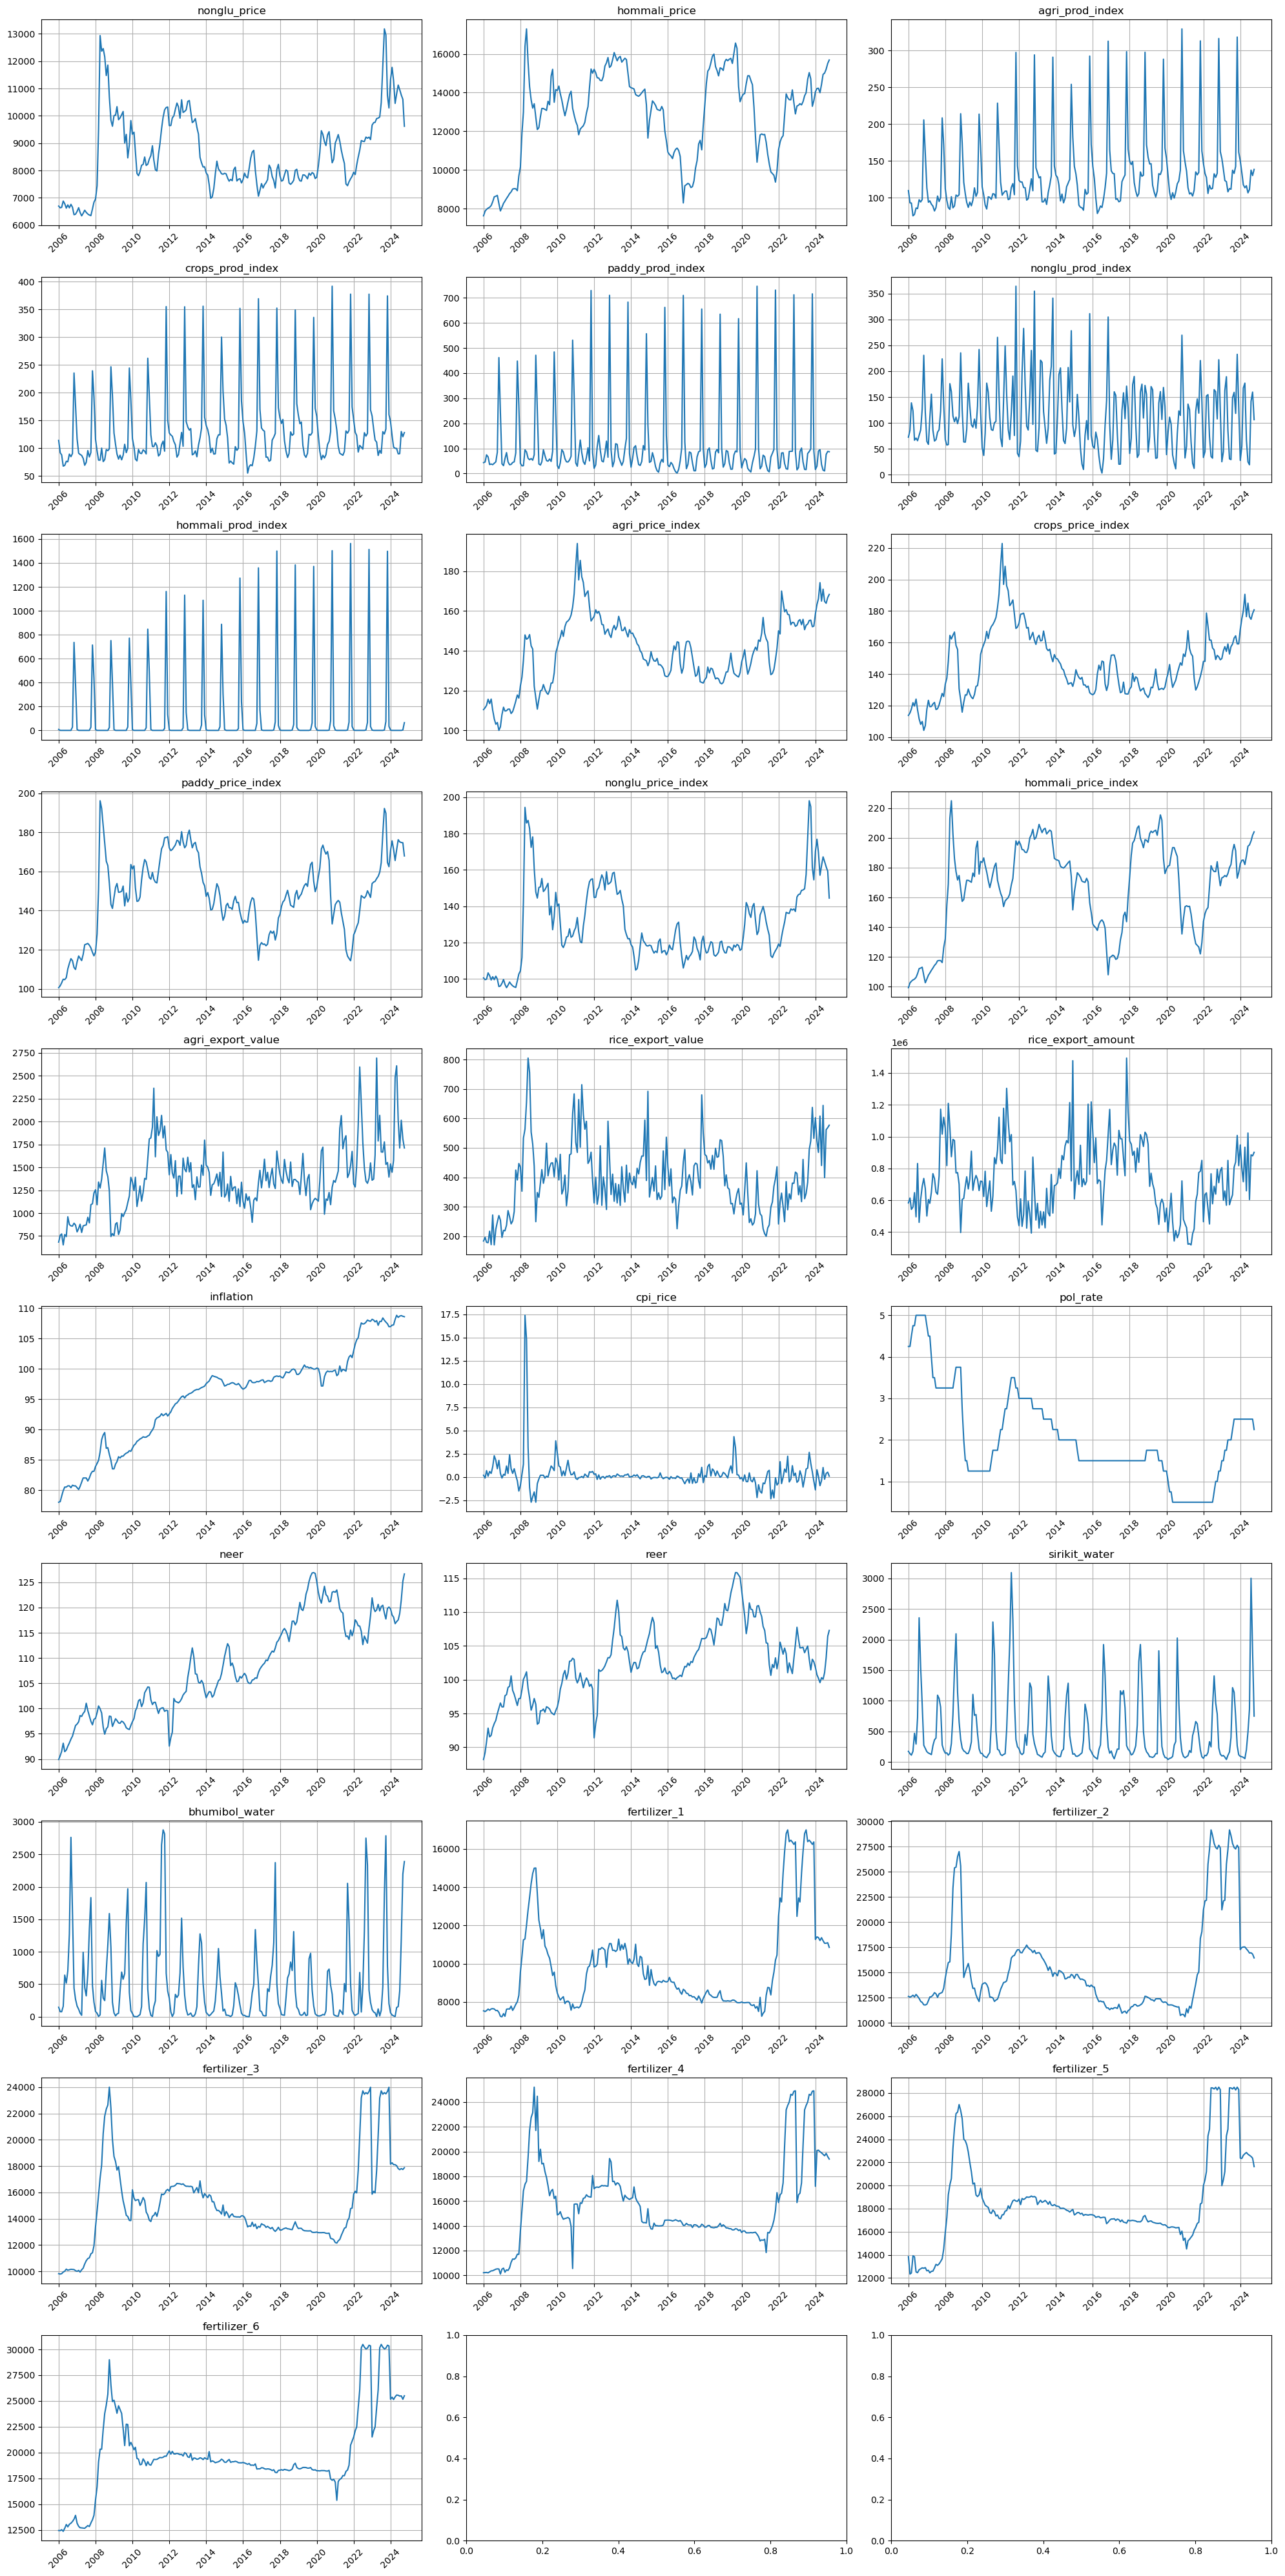

In [12]:
columns = ['nonglu_price', 'hommali_price', 'agri_prod_index', 'crops_prod_index',
           'paddy_prod_index', 'nonglu_prod_index', 'hommali_prod_index',
           'agri_price_index', 'crops_price_index', 'paddy_price_index',
           'nonglu_price_index', 'hommali_price_index', 'agri_export_value',
           'rice_export_value', 'rice_export_amount', 'inflation', 'cpi_rice',
           'pol_rate', 'neer', 'reer', 'sirikit_water', 'bhumibol_water',
           'fertilizer_1', 'fertilizer_2', 'fertilizer_3', 'fertilizer_4',
           'fertilizer_5', 'fertilizer_6']

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
axes = axes.ravel()

for idx, col in enumerate(columns):
    axes[idx].plot(df[col])
    axes[idx].set_title(col)
    axes[idx].grid(True)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Features Categories

## 1. Non-Glutinous and Thai Hom Mali Paddy Price

#### Non-Glutinous and Thai Hom Mali Paddy Price

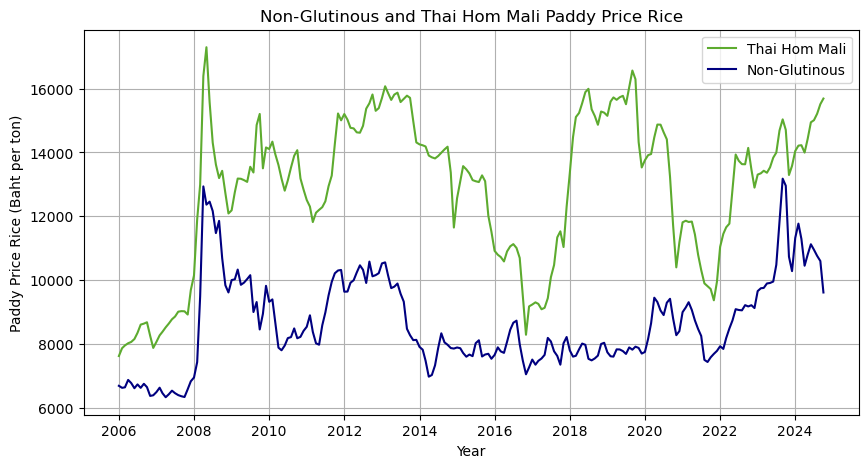

<Figure size 640x480 with 0 Axes>

In [16]:
# Non-Glutinous and Thai Hom Mali Paddy Price Rice (Baht per ton)
plt.figure(figsize=(10,5))
plt.plot(df['hommali_price'], c='#5DAB2F', label='Thai Hom Mali')
plt.plot(df['nonglu_price'], c='navy', label= 'Non-Glutinous')
plt.title('Non-Glutinous and Thai Hom Mali Paddy Price Rice')
plt.ylabel('Paddy Price Rice (Baht per ton)')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.show()

# saving the plot as an image
plt.savefig("../figure/eda/Non-Glutinous and Thai Hom Mali Paddy Price Rice (Baht per ton).png")
plt.show()

#### Non-Glutinous and Thai Hom Mali Paddy Price Rice Index (Base Year 2005)

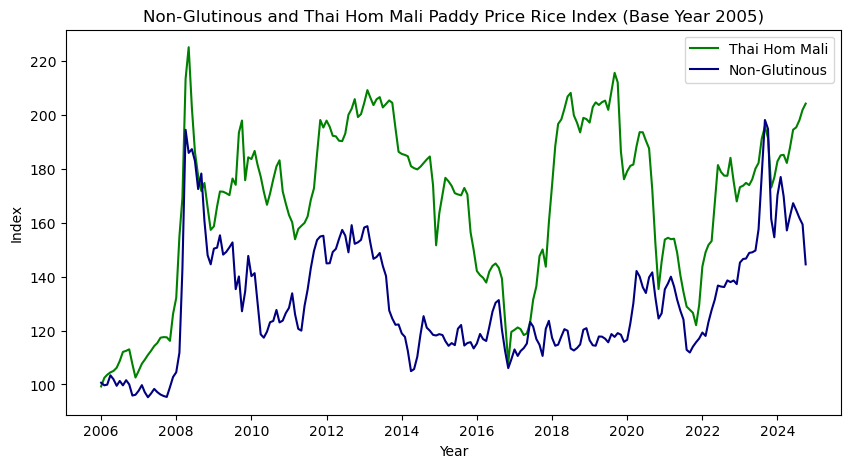

In [18]:
#'Non-Glutinous and Thai Hom Mali Paddy Price Rice Index (Base Year 2005)
plt.figure(figsize=(10,5))
plt.plot(df['hommali_price_index'], c='green', label='Thai Hom Mali')
plt.plot(df['nonglu_price_index'], c='navy', label= 'Non-Glutinous')
plt.title('Non-Glutinous and Thai Hom Mali Paddy Price Rice Index (Base Year 2005)')
plt.ylabel('Index')
plt.xlabel('Year')
plt.legend()

# saving the plot as an image
plt.savefig("../figure/eda/Non-Glutinous and Thai Hom Mali Paddy Price Rice Index.png")
plt.show()

## 2. Production Index

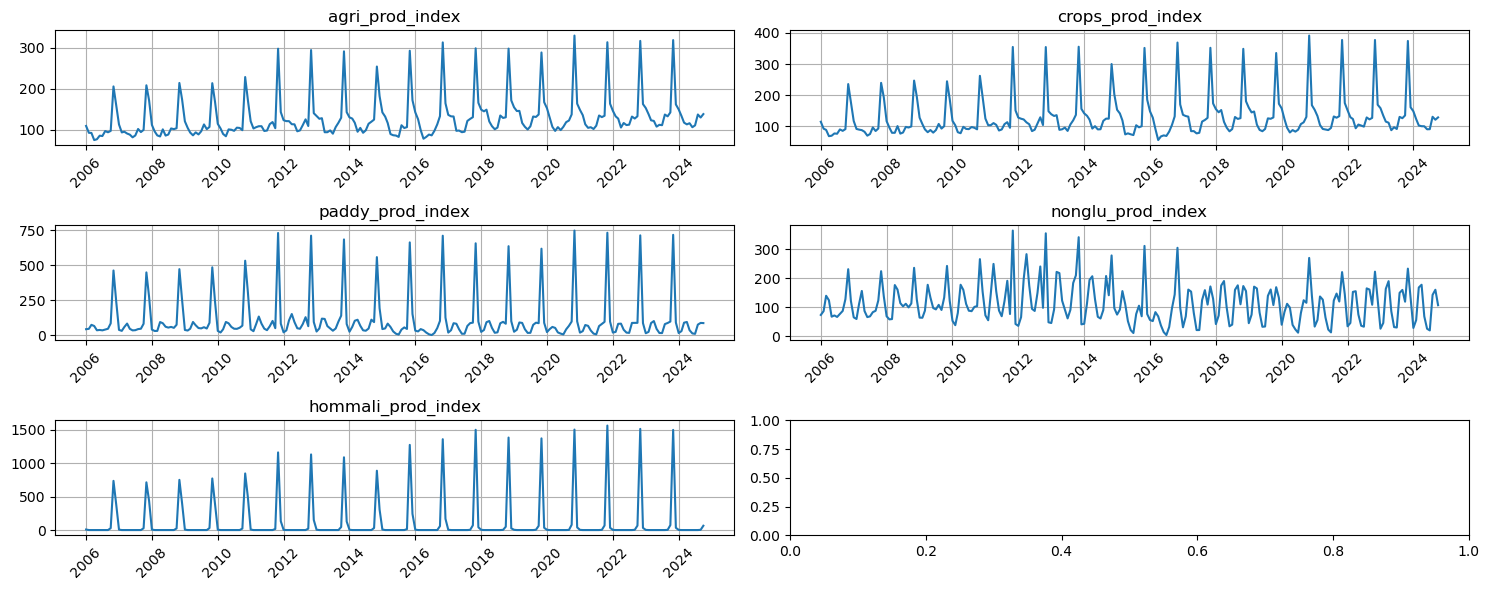

In [61]:
# Production Index
xvars_prod_index = ['agri_prod_index', 'crops_prod_index','paddy_prod_index', 'nonglu_prod_index', 'hommali_prod_index']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 6))
axes = axes.ravel()

for idx, col in enumerate(xvars_prod_index):
    axes[idx].plot(df[col])
    axes[idx].set_title(col)
    axes[idx].grid(True)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()

# saving the plot as an image
plt.savefig("../figure/eda/Production Index.png")
plt.show()

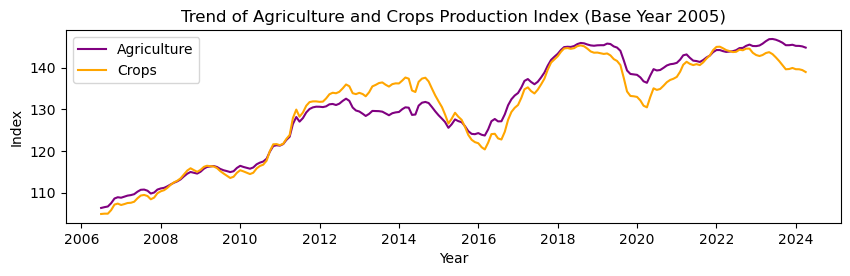

In [21]:
# Trend of Agriculture and Crops Production Index
plt.figure(figsize=(10,2.5))
plt.plot(df.index, seasonal_decompose(df['agri_prod_index']).trend, c='purple', label='Agriculture')
plt.plot(df.index, seasonal_decompose(df['crops_prod_index']).trend, c='orange', label='Crops')
plt.title('Trend of Agriculture and Crops Production Index (Base Year 2005)')
plt.ylabel('Index')
plt.xlabel('Year')
plt.legend(loc='upper left')

# saving the plot as an image
plt.savefig("../figure/eda/Trend of Agriculture and Crops Production Index.png",bbox_inches = 'tight')
plt.show()

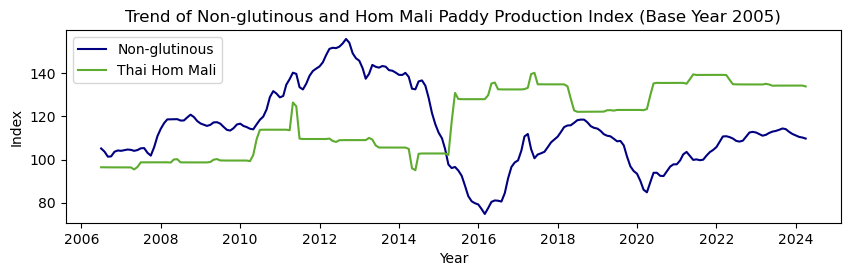

In [22]:
# Trend of Non-glutinous and Hom Mali Paddy Production Index (Base Year 2005)
plt.figure(figsize=(10,2.5))
plt.plot(df.index, seasonal_decompose(df['nonglu_prod_index']).trend, c='navy', label='Non-glutinous')
plt.plot(df.index, seasonal_decompose(df['hommali_prod_index']).trend, c='#5DAB2F', label='Thai Hom Mali')
plt.title('Trend of Non-glutinous and Hom Mali Paddy Production Index (Base Year 2005)')
plt.ylabel('Index')
plt.xlabel('Year')
plt.legend(loc='upper left')

# saving the plot as an image
plt.savefig("../figure/eda/Trend of Non-glutinous and Hom Mali Paddy Production Index (Base Year 2005).png",bbox_inches = 'tight')
plt.show()

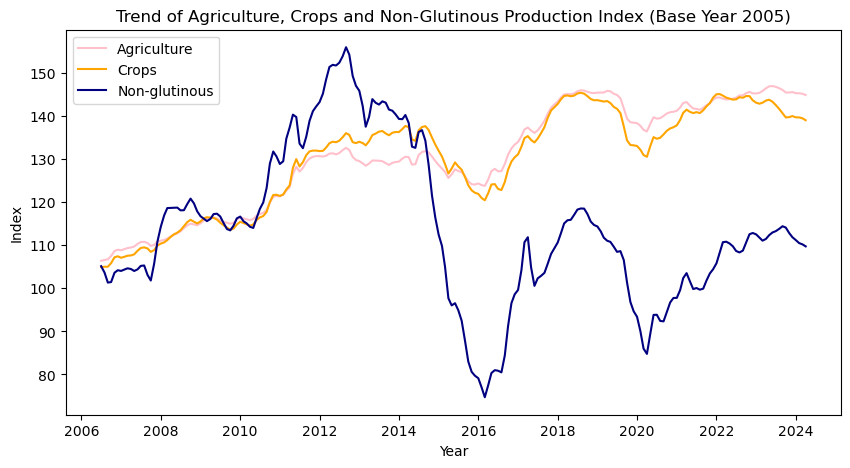

In [23]:
# Trend of Agriculture, Crops and Non-Glutinous Production Index
plt.figure(figsize=(10,5))
plt.plot(df.index, seasonal_decompose(df['agri_prod_index']).trend, c='pink', label='Agriculture')
plt.plot(df.index, seasonal_decompose(df['crops_prod_index']).trend, c='orange', label='Crops')
plt.plot(df.index, seasonal_decompose(df['nonglu_prod_index']).trend, c='navy', label='Non-glutinous')
plt.title('Trend of Agriculture, Crops and Non-Glutinous Production Index (Base Year 2005)')
plt.ylabel('Index')
plt.xlabel('Year')
plt.legend(loc='upper left')

# saving the plot as an image
plt.savefig("../figure/eda/Trend of Agriculture, Crops and Non-Glutinous Production Index.png",bbox_inches = 'tight')
plt.show()

## 3. Export and Finance indicator

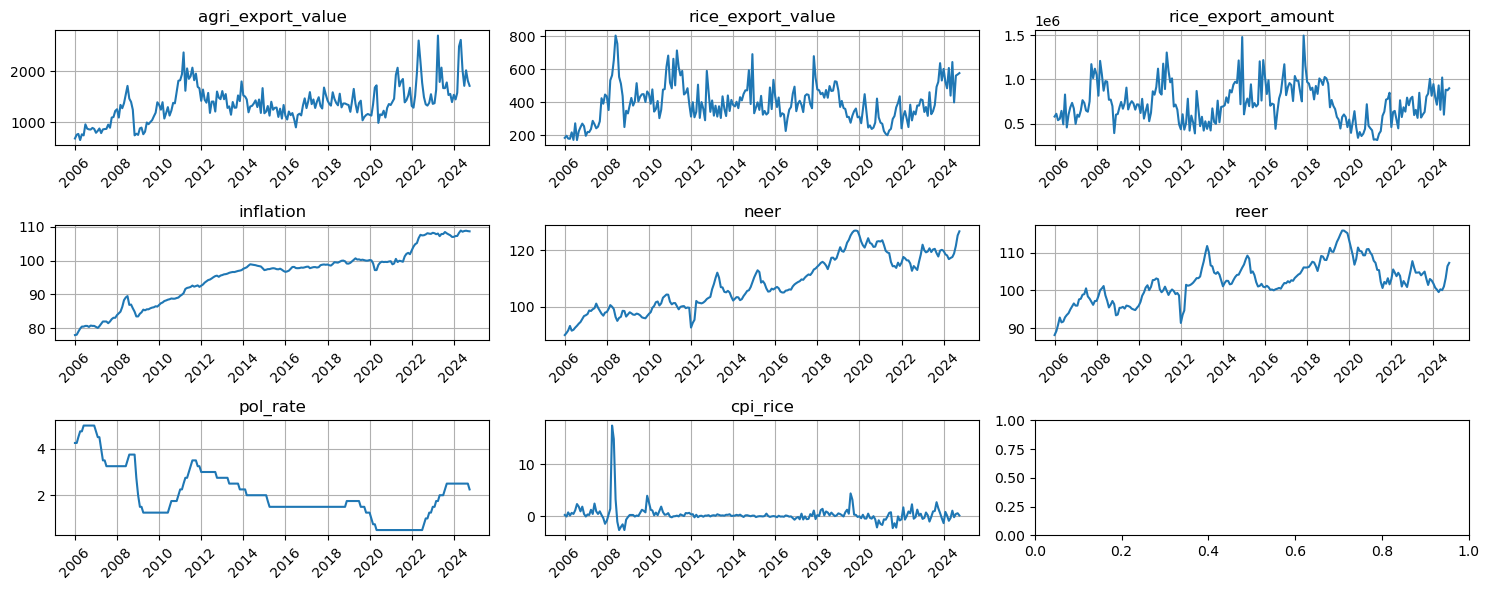

In [25]:
# Export and Finance indicators
xvars_export_finance = ['agri_export_value', 'rice_export_value','rice_export_amount', 
                        'inflation', 'neer', 'reer', 'pol_rate', 'cpi_rice']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 6))
axes = axes.ravel()

for idx, col in enumerate(xvars_export_finance):
    axes[idx].plot(df[col])
    axes[idx].set_title(col)
    axes[idx].grid(True)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()

# saving the plot as an image
plt.savefig("../figure/eda/Export and Finance indicators).png")
plt.show()

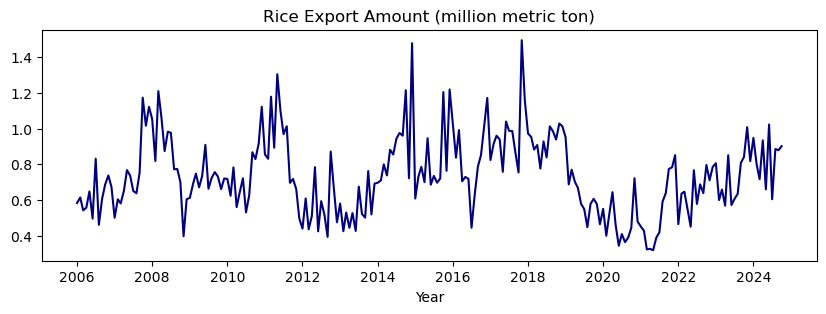

In [26]:
# Rice Export Amount
plt.figure(figsize=(10,3))
plt.plot(df.index, df['rice_export_amount']/1_000_000, c='navy')
plt.title('Rice Export Amount (million metric ton)')
plt.xlabel('Year')

# saving the plot as an image
plt.savefig("../figure/eda/Rice Export Amount (million metric ton)",bbox_inches = 'tight')
plt.show()

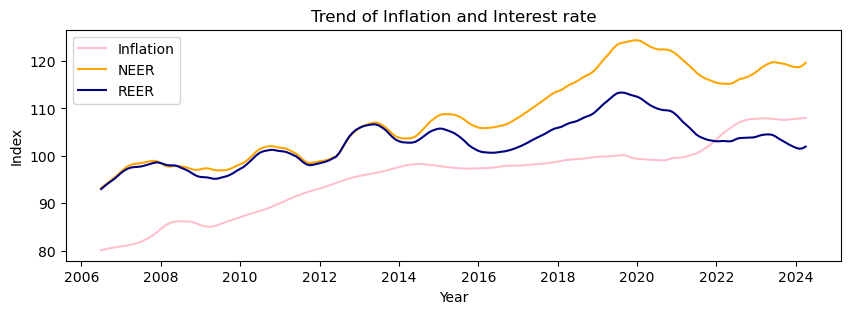

In [57]:
# Trend of Inflation and Interest rate
plt.figure(figsize=(10,3))
plt.plot(df.index, seasonal_decompose(df['inflation']).trend, c='pink', label='Inflation')
plt.plot(df.index, seasonal_decompose(df['neer']).trend, c='orange', label='NEER')
plt.plot(df.index, seasonal_decompose(df['reer']).trend, c='navy', label='REER')
plt.title('Trend of Inflation and Interest rate')
plt.ylabel('Index')
plt.xlabel('Year')
plt.legend(loc='upper left')

# saving the plot as an image
plt.savefig("../figure/eda/Trend of Inflation and Interest rate.png",bbox_inches = 'tight')
plt.show()

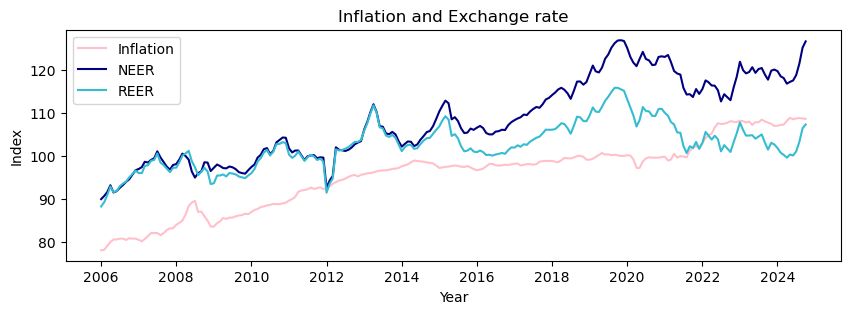

In [59]:
# Inflation and Exchange rate
plt.figure(figsize=(10,3))
plt.plot(df.index, df['inflation'], c='pink', label='Inflation')
plt.plot(df.index, df['neer'], c='navy', label='NEER')
plt.plot(df.index, df['reer'], c='#35BCD1', label='REER')
plt.title('Inflation and Exchange rate')
plt.ylabel('Index')
plt.xlabel('Year')
plt.legend(loc='upper left')

# saving the plot as an image
plt.savefig("../figure/eda/Inflation and Exchange rate.png",bbox_inches = 'tight')
plt.show()

## 4. Water and Fertilizer

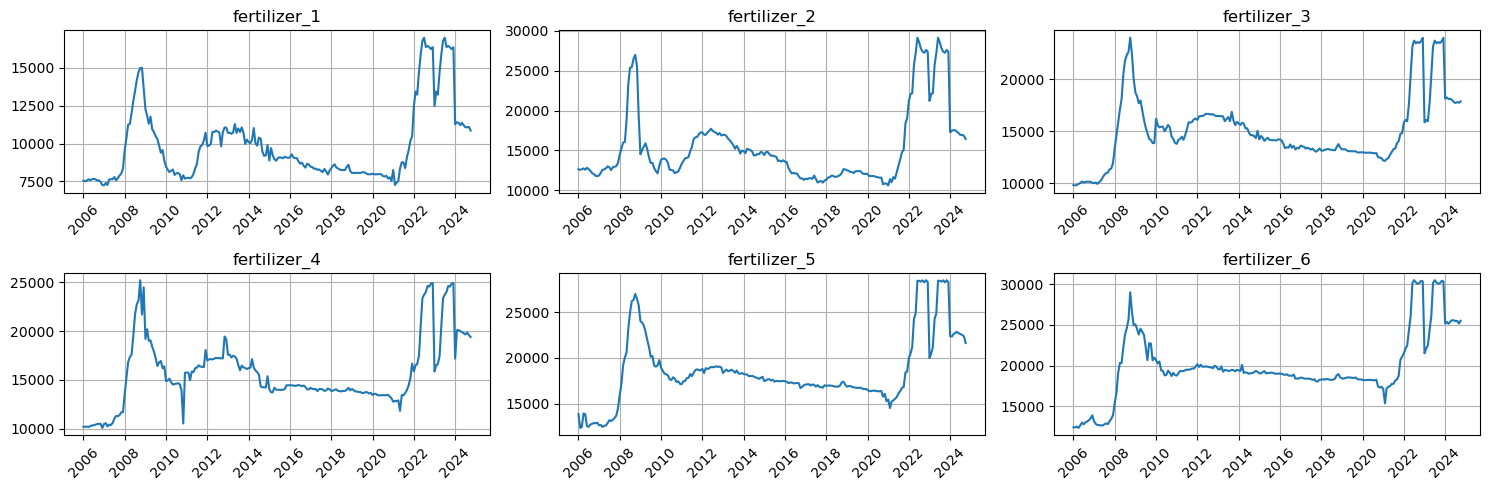

In [30]:
# Fertilizer Price
xvars_fertilizer = ['fertilizer_1', 'fertilizer_2', 'fertilizer_3', 'fertilizer_4','fertilizer_5', 'fertilizer_6']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
axes = axes.ravel()

for idx, col in enumerate(xvars_fertilizer):
    axes[idx].plot(df[col])
    axes[idx].set_title(col)
    axes[idx].grid(True)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()


# saving the plot as an image
plt.savefig("../figure/eda/Fertilizer Price (Baht per ton).png")
plt.show()

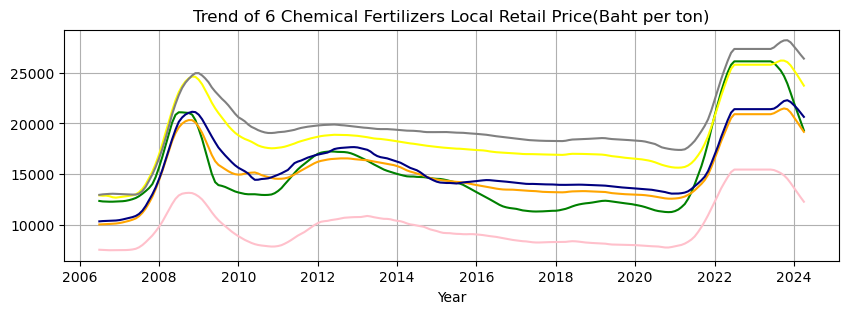

In [31]:
# Trend of Fertilizer Price
plt.figure(figsize=(10,3))
plt.plot(df.index, seasonal_decompose(df['fertilizer_1']).trend, c='pink', label='fertilizer_1')
plt.plot(df.index, seasonal_decompose(df['fertilizer_2']).trend, c='green', label='fertilizer_2')
plt.plot(df.index, seasonal_decompose(df['fertilizer_3']).trend, c='orange', label='fertilizer_3')
plt.plot(df.index, seasonal_decompose(df['fertilizer_4']).trend, c='navy', label='fertilizer_4')
plt.plot(df.index, seasonal_decompose(df['fertilizer_5']).trend, c='yellow', label='fertilizer_5')
plt.plot(df.index, seasonal_decompose(df['fertilizer_6']).trend, c='grey', label='fertilizer_6')
plt.title('Trend of 6 Chemical Fertilizers Local Retail Price(Baht per ton)')
plt.xlabel('Year')
plt.grid(True)

# saving the plot as an image
plt.savefig("../figure/eda/Trend of 6 Chemical Fertilizers Local Retail Price.png",bbox_inches = 'tight')
plt.show()

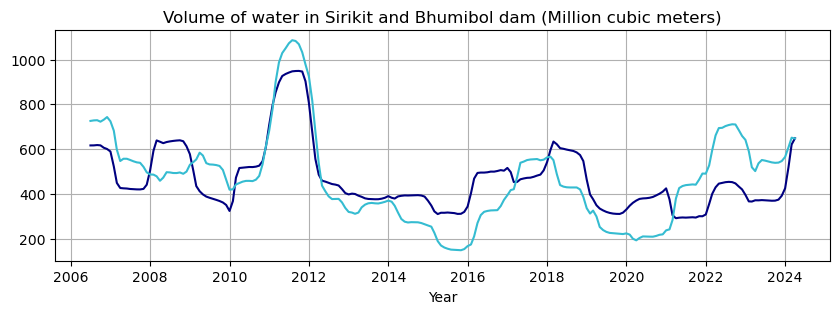

In [32]:
# Volume of water in Sirikit and Bhumibol dam 
plt.figure(figsize=(10,3))
plt.plot(df.index, seasonal_decompose(df['sirikit_water']).trend, c='navy', label='Sirikit')
plt.plot(df.index, seasonal_decompose(df['bhumibol_water']).trend, c='#35BCD1', label='Bhumibol')
plt.title('Volume of water in Sirikit and Bhumibol dam (Million cubic meters)')
plt.xlabel('Year')
plt.grid(True)

# saving the plot as an image
plt.savefig("../figure/eda/Volume of water in Sirikit and Bhumibol dam (Million cubic meters).png",bbox_inches = 'tight')
plt.show()